In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [179]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [180]:
conso_file = r"Y:\Documents\conso.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195825 entries, 0 to 195824
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  195825 non-null  int64  
 1   kWh       195825 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.0 MB


<Axes: >

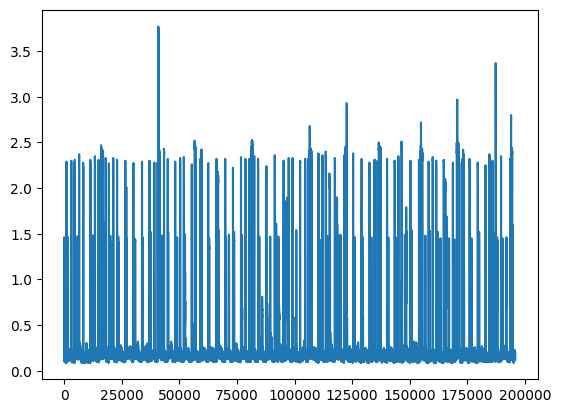

In [181]:
conso_data['kWh'].plot()

In [182]:
l=len(conso_data)-1
l

195824

In [183]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [184]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
195820,28406,0.13,28.406,126.733789,4645875470
195821,28537,0.13,28.537,126.152013,4645904007
195822,29371,0.12,29.371,122.569882,4645933378
195823,29172,0.12,29.172,123.406006,4645962550
195824,29121,0.12,29.121,123.622128,4645991671


In [185]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

4645991671000

In [186]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2024, 3, 7, 1, 53, 24, 232725)

In [187]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:53:50.521725,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:54:16.764725,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:54:42.649725,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:55:08.403725,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:55:34.177725,07/03/2024
...,...,...,...,...,...,...,...
195820,28406,0.13,28.406,126.733789,4645875470,2024-04-29 20:24:39.702725,29/04/2024
195821,28537,0.13,28.537,126.152013,4645904007,2024-04-29 20:25:08.239725,29/04/2024
195822,29371,0.12,29.371,122.569882,4645933378,2024-04-29 20:25:37.610725,29/04/2024
195823,29172,0.12,29.172,123.406006,4645962550,2024-04-29 20:26:06.782725,29/04/2024


In [188]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year


('29/04/2024', 4, 2024)

In [189]:
here = now.strftime('%H:%M:%S')
here

'20:26:39'

In [190]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [191]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
192528,26754,0.13,26.754,134.559318,4572418849,2024-04-29 00:00:23.081725,29/04/2024
192529,25856,0.14,25.856,139.232673,4572444705,2024-04-29 00:00:48.937725,29/04/2024
192530,25874,0.14,25.874,139.135812,4572470579,2024-04-29 00:01:14.811725,29/04/2024
192531,26679,0.13,26.679,134.937591,4572497258,2024-04-29 00:01:41.490725,29/04/2024
192532,26728,0.13,26.728,134.690213,4572523986,2024-04-29 00:02:08.218725,29/04/2024
...,...,...,...,...,...,...,...
195820,28406,0.13,28.406,126.733789,4645875470,2024-04-29 20:24:39.702725,29/04/2024
195821,28537,0.13,28.537,126.152013,4645904007,2024-04-29 20:25:08.239725,29/04/2024
195822,29371,0.12,29.371,122.569882,4645933378,2024-04-29 20:25:37.610725,29/04/2024
195823,29172,0.12,29.172,123.406006,4645962550,2024-04-29 20:26:06.782725,29/04/2024


In [192]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000
df_grp

,kWh
days,
07/03/2024,3.128
08/03/2024,3.751
09/03/2024,3.081
10/03/2024,3.533
11/03/2024,4.539
12/03/2024,3.560
13/03/2024,3.543
14/03/2024,3.651
15/03/2024,3.563


In [193]:
data = list(df_grp['kWh'])
print(data)


[3.128, 3.751, 3.081, 3.533, 4.539, 3.56, 3.543, 3.651, 3.563, 3.359, 3.35, 4.403, 3.507, 3.441, 3.551, 3.742, 3.53, 3.335, 3.893, 3.418, 3.473, 3.636, 3.759, 3.655, 3.83, 3.836, 3.819, 3.42, 3.475, 4.419, 3.399, 4.075, 3.78, 4.06, 3.433, 3.576, 3.442, 4.119, 3.272, 3.32, 3.702, 3.688, 4.221, 3.282, 3.382, 3.765, 4.088, 3.503, 3.3, 3.291, 3.061, 3.758, 3.811, 3.297]


In [194]:

import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [195]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.326198
dtype: float64

In [196]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.626389
dtype: float64

In [204]:
last=df_grp.iloc[-1]['kWh']

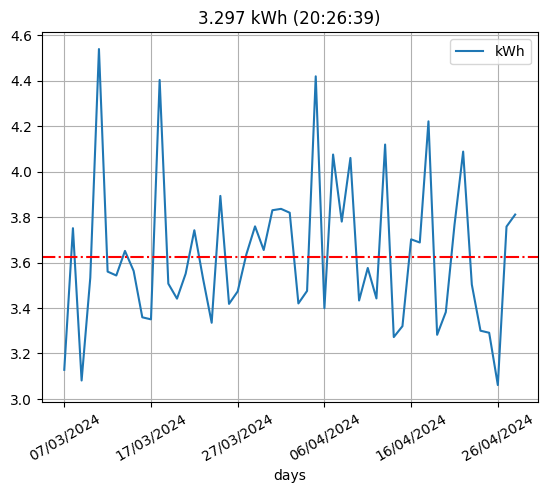

In [205]:
# plot the day consos in the group
df_grp.iloc[:-1].plot(grid=True)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [199]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:23,26754,0.13,26.754,134.559318,4572418849,2024-04-29 00:00:23.081725,29/04/2024
0:0:48,25856,0.14,25.856,139.232673,4572444705,2024-04-29 00:00:48.937725,29/04/2024
0:1:14,25874,0.14,25.874,139.135812,4572470579,2024-04-29 00:01:14.811725,29/04/2024
0:1:41,26679,0.13,26.679,134.937591,4572497258,2024-04-29 00:01:41.490725,29/04/2024
0:2:8,26728,0.13,26.728,134.690213,4572523986,2024-04-29 00:02:08.218725,29/04/2024
...,...,...,...,...,...,...,...
20:24:39,28406,0.13,28.406,126.733789,4645875470,2024-04-29 20:24:39.702725,29/04/2024
20:25:8,28537,0.13,28.537,126.152013,4645904007,2024-04-29 20:25:08.239725,29/04/2024
20:25:37,29371,0.12,29.371,122.569882,4645933378,2024-04-29 20:25:37.610725,29/04/2024


In [200]:
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('20:26:39', 3.297, 3297)

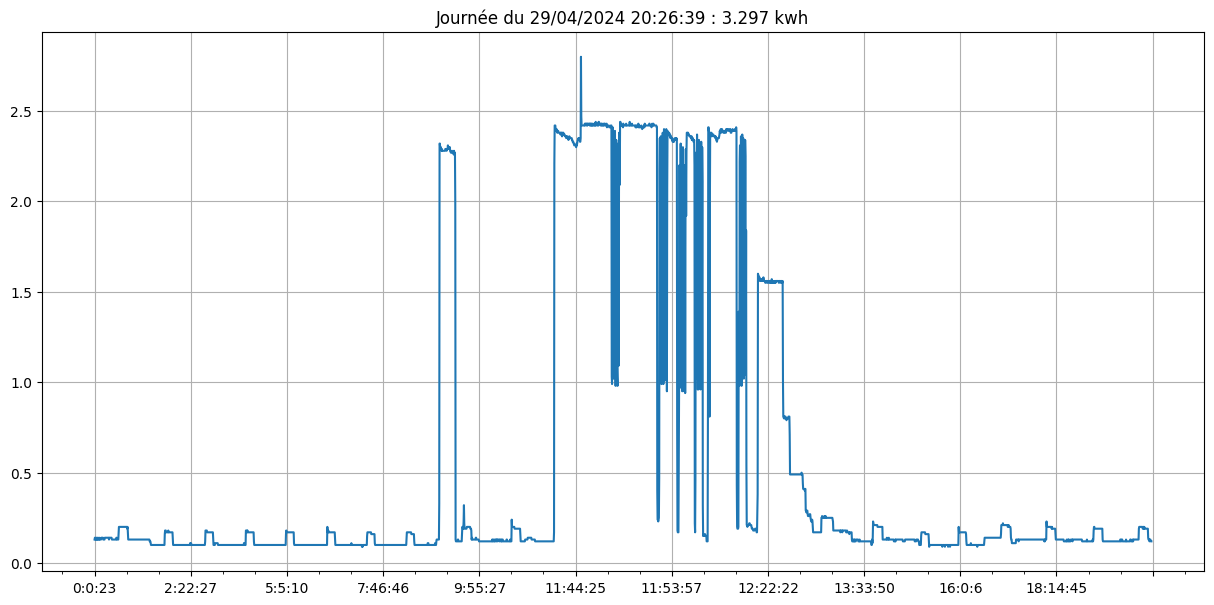

In [201]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()